In [129]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd

%matplotlib inline

emply = pd.read_excel(open('../../../../Data/CS120Clinical/CS120Final_Baseline.xlsx','r'))
subjects = emply['ID']
subjects = subjects.astype(str)
subjects_employed = subjects[emply['slabels02']==1]
subjects_unemployed = subjects[np.logical_and(emply['slabels02']>=2,emply['slabels02']<=5)]

data_dir = '/home/sohrob/Dropbox/Data/CS120/'
subjects = os.listdir(data_dir)

loc_subject = []
loc_subject_employed = []
loc_all_employed = np.array([])
loc_subject_unemployed = []
loc_all_unemployed = np.array([])
subject_loc = np.array([])
subject_employed = np.array([])
for subj in subjects:
    filename = data_dir + subj + '/eml.csv'
    if os.path.exists(filename):
        #print filename
        with open(filename) as file_in:
            data = csv.reader(file_in, delimiter='\t')
            loc = np.array([])
            for data_row in data:
                if data_row:
                    loc_string = data_row[6]
                    loc_string = loc_string[1:len(loc_string)-1]
                    loc = np.append(loc, loc_string)
                    if any(subjects_employed==subj):
                        loc_all_employed = np.append(loc_all, loc_string)
                    else:
                        loc_all_unemployed = np.append(loc_all, loc_string)
        if any(subjects_employed==subj):
            loc_subject_employed.append(np.unique(loc))
            subject_employed = np.append(subject_employed, 1)
        else:
            loc_subject_unemployed.append(np.unique(loc))
            subject_employed = np.append(subject_employed, 0)
        loc_subject.append(loc)
        subject_loc = np.append(subject_loc, subj)
    else:
        print 'subject '+subj+' skipped due to no eml.csv'



subject EW057DI skipped due to no eml.csv
subject 1496251 skipped due to no eml.csv
subject .dropbox skipped due to no eml.csv


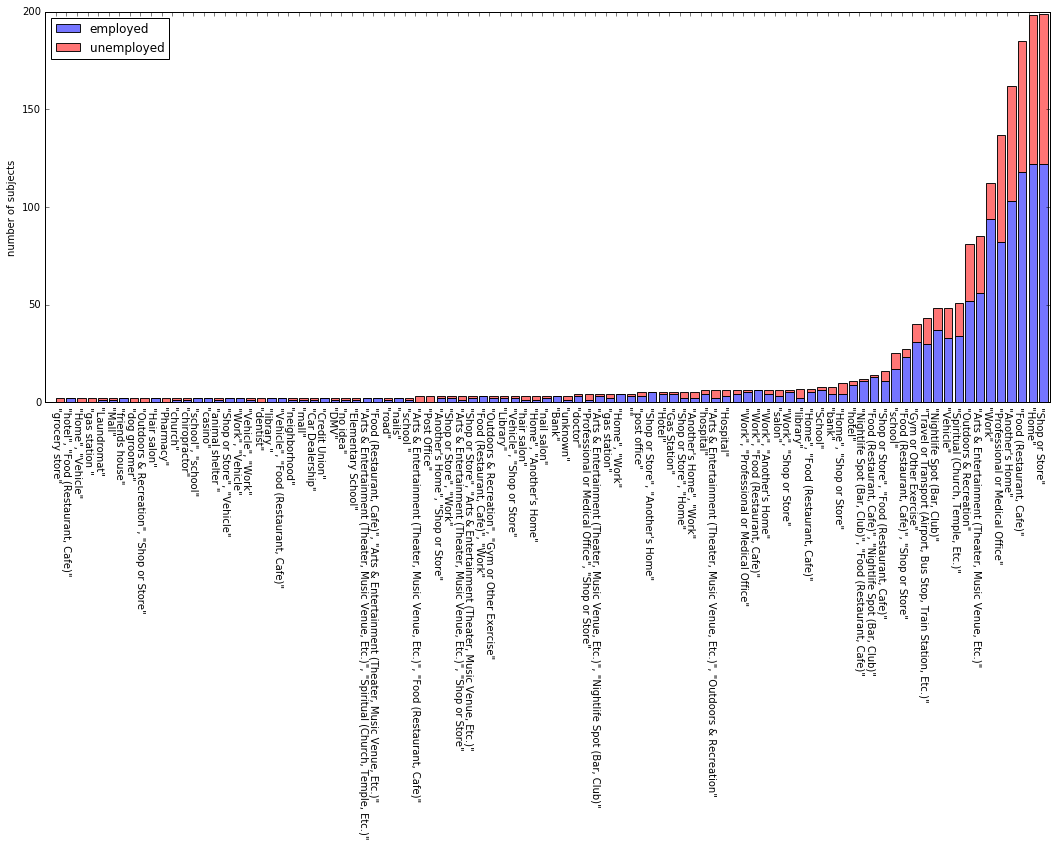

In [93]:
# finding number of subjects who used each location (employed)
import pickle

save_results = False

loc_all_uniq = np.unique(np.append(loc_all_employed,loc_all_unemployed))
freq_employed = np.zeros(loc_all_uniq.size)
freq_unemployed = np.zeros(loc_all_uniq.size)
for (i,loc_uniq) in enumerate(loc_all_uniq):
    for loc_subj in loc_subject_employed:
        if loc_uniq in loc_subj:
            freq_employed[i] += 1
    for loc_subj in loc_subject_unemployed:
        if loc_uniq in loc_subj:
            freq_unemployed[i] += 1

# removing total freq < 1
ind_highfreq = np.where(freq_employed+freq_unemployed>1)[0]
loc_all_uniq = loc_all_uniq[ind_highfreq]
freq_employed = freq_employed[ind_highfreq]
freq_unemployed = freq_unemployed[ind_highfreq]

# sorting based on total frequency
ind_sort = np.argsort(freq_employed+freq_unemployed)
loc_all_uniq = loc_all_uniq[ind_sort]
freq_employed = freq_employed[ind_sort]
freq_unemployed = freq_unemployed[ind_sort]

# saving the most frequent locations
loc_top10 = loc_all_uniq[91:]
if save_results:
    with open('top10.dat', 'w') as file_out:
        pickle.dump(loc_top10, file_out)
    file_out.close()

# plotting
plt.figure(figsize=(18,7))
show_from = 0
axes = plt.gca()
axes.bar(range(len(loc_all_uniq)-show_from), freq_employed[show_from:], color=(.4,.4,1), alpha=0.9)
axes.bar(range(len(loc_all_uniq)-show_from), freq_unemployed[show_from:], bottom=freq_employed[show_from:], color=(1,.4,.4), alpha=0.9)
plt.legend(['employed','unemployed'],loc='upper left')
plt.ylabel('number of subjects')
axes.set_xlim([-1, len(loc_all_uniq)-show_from])
plt.xticks(range(len(loc_all_uniq)-show_from), loc_all_uniq[show_from:], fontsize=10, color=(0,0,0), rotation=270);

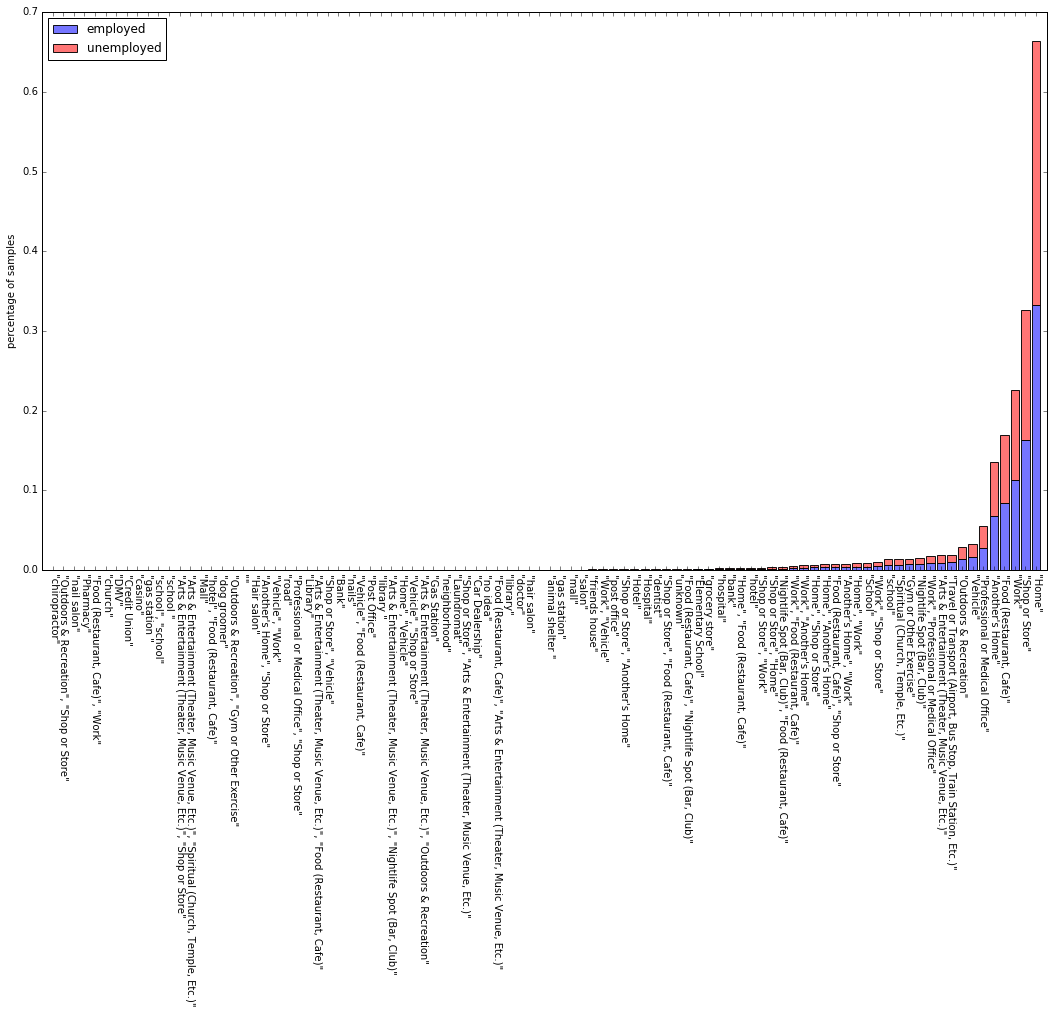

In [125]:
# finding the number of samples for each location in all subjects
# this will be roughly equivalent to the average percentage of time spent at that location across the subjects

loc_all_uniq = np.unique(np.append(loc_all_employed,loc_all_unemployed))

# filtering based on freq > 1
freq_employed = np.zeros(loc_all_uniq.size)
freq_unemployed = np.zeros(loc_all_uniq.size)
for (i,loc_uniq) in enumerate(loc_all_uniq):
    for loc_subj in loc_subject_employed:
        if loc_uniq in loc_subj:
            freq_employed[i] += 1
    for loc_subj in loc_subject_unemployed:
        if loc_uniq in loc_subj:
            freq_unemployed[i] += 1

# removing total freq < 1
ind_highfreq = np.where(freq_employed+freq_unemployed>1)[0]
loc_all_uniq = loc_all_uniq[ind_highfreq]

perc_employed = np.array([])
perc_unemployed = np.array([])
for (i,loc_uniq) in enumerate(loc_all_uniq):
    inds_employed = np.where(loc_all_employed==loc_uniq)[0]
    perc_employed = np.append(perc_employed, inds_employed.size/float(loc_all_employed.size))
    inds_unemployed = np.where(loc_all_unemployed==loc_uniq)[0]
    perc_unemployed = np.append(perc_unemployed, inds_unemployed.size/float(loc_all_unemployed.size))
                              
ind_sort = np.argsort(perc_employed+perc_unemployed)
loc_all_uniq = loc_all_uniq[ind_sort]
perc_employed = perc_employed[ind_sort]
perc_unemployed = perc_unemployed[ind_sort]

plt.figure(figsize=(18,10))
show_from = 0
axes = plt.gca()
axes.bar(range(len(loc_all_uniq)-show_from), perc_employed[show_from:], align='center', color=(.4,.4,1), alpha=0.9)
axes.bar(range(len(loc_all_uniq)-show_from), perc_unemployed[show_from:], bottom=perc_employed[show_from:], align='center', color=(1,.4,.4), alpha=0.9)
plt.legend(['employed','unemployed'],loc='upper left')
plt.ylabel('percentage of samples')
axes.set_xlim([-1, len(loc_all_uniq)-show_from])
plt.xticks(range(len(loc_all_uniq)-show_from), loc_all_uniq[show_from:], fontsize=10, color=(0,0,0), rotation=270);

In [61]:
print loc_all_uniq

['"school", "school"' '"Shop or Store", "Vehicle"'
 '"Shop or Store", "Work"' '"Vehicle", "Food (Restaurant, Cafe)"'
 '"Vehicle", "Shop or Store"'
 '"Outdoors & Recreation", "Gym or Other Exercise"' '"Work", "Vehicle"'
 '"Library"' '"casino"' '"friends house"' '"gas station"' '"Hair salon"'
 '"Shop or Store", "Arts & Entertainment (Theater, Music Venue, Etc.)"'
 '"library "' '"hotel", "Food (Restaurant, Cafe)"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)", "Outdoors & Recreation"'
 '"Another\'s Home", "Shop or Store"' '"Another\'s Home", "Work"'
 '"library"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)", "Spiritual (Church, Temple, Etc.)"'
 '"Shop or Store", "Home"' '"nails"'
 '"Food (Restaurant, Cafe)", "Arts & Entertainment (Theater, Music Venue, Etc.)"'
 '"nail salon"' '"Credit Union"' '"Bank"' '"doctor"' '"Hospital"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)", "Nightlife Spot (Bar, Club)"'
 '"post office"' '"salon"' '""' '"Food (Restaurant, Cafe)", "Work

['"Work"' '"Professional or Medical Office"' '"Another\'s Home"'
 '"Food (Restaurant, Cafe)"' '"Home"' '"Shop or Store"']


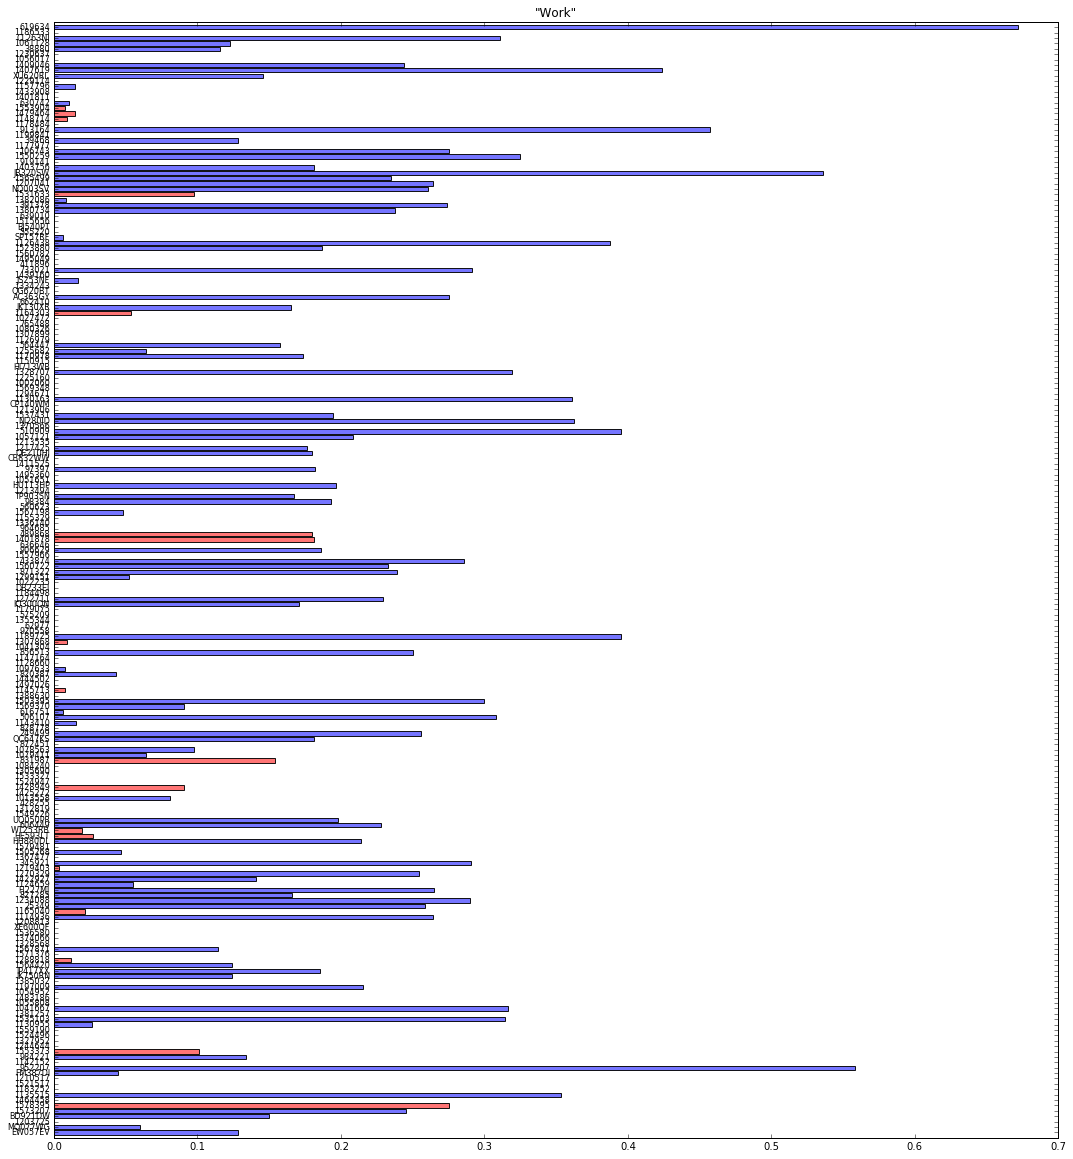

In [164]:
# now looking subject wise for important categories

loc_all_uniq = np.unique(np.append(loc_all_employed,loc_all_unemployed))
freq_employed = np.zeros(loc_all_uniq.size)
freq_unemployed = np.zeros(loc_all_uniq.size)
for (i,loc_uniq) in enumerate(loc_all_uniq):
    for loc_subj in loc_subject_employed:
        if loc_uniq in loc_subj:
            freq_employed[i] += 1
    for loc_subj in loc_subject_unemployed:
        if loc_uniq in loc_subj:
            freq_unemployed[i] += 1

# sorting based on total frequency
ind_sort = np.argsort(freq_employed+freq_unemployed)
loc_all_uniq = loc_all_uniq[ind_sort]

# only keeping top 3
loc_all_uniq = loc_all_uniq[loc_all_uniq.size-6:]

# calculating subject-wise percentages
perc = np.empty([loc_all_uniq.size, len(loc_subject)])
for (i,loc_uniq) in enumerate(loc_all_uniq):
    for (j,loc_subj) in enumerate(loc_subject):
        ind = np.where(loc_subj==loc_uniq)[0]
        perc[i,j] = float(ind.size)/float(loc_subj.size)

plt.figure(figsize=(18,20))
axes = plt.gca()
cat = 0
for (i,s) in enumerate(loc_subject):
    if subject_employed[i]:
        plt.barh(i, perc[cat,i], align='center', color=(.4,.4,1), alpha=0.9)
    else:
        plt.barh(i, perc[cat,i], align='center', color=(1,.4,.4), alpha=0.9)
plt.title(loc_all_uniq[cat])
plt.yticks(range(len(subject_loc)), np.array(subject_loc), fontsize=8, color=(0,0,0));
axes = plt.gca()
axes.set_ylim([-1, len(subject_loc)])
print loc_all_uniq

In [168]:
len(loc_subject_unemployed)/float(127+79)

0.38349514563106796